In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import soundscapy as sspy
from soundscapy.databases import isd

# from soundscapy.surveys import LANGUAGE_ANGLES, PAQ_IDS, PAQ_LABELS

In [101]:
print(sspy.__version__)

0.8.0rc5


In [151]:
ssid = sspy.isd.load()
ssid, excl = sspy.isd.validate(ssid, allow_paq_na=False)
ssid = sspy.surveys.add_iso_coords(ssid)
ssid.iloc[:5, :23]

,LocationID,SessionID,GroupID,RecordID,start_time,end_time,latitude,longitude,Language,Survey_Version,...,ssi04,PAQ1,PAQ4,PAQ2,PAQ7,PAQ8,PAQ5,PAQ3,PAQ6,sss01
0,CarloV,CarloV2,2CV12,1434,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,3.0,2.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,3.0
1,CarloV,CarloV2,2CV12,1435,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,3.0,2.0,4.0,4.0,1.0,1.0,4.0,4.0,4.0,4.0
2,CarloV,CarloV2,2CV13,1430,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,4.0,5.0,1.0,3.0,3.0,4.0,2.0,3.0,1.0,4.0
3,CarloV,CarloV2,2CV13,1431,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,4.0,5.0,1.0,3.0,3.0,4.0,2.0,3.0,2.0,4.0
4,CarloV,CarloV2,2CV13,1432,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,3.0,5.0,2.0,3.0,3.0,4.0,2.0,3.0,3.0,4.0


In [118]:
location_counts_ssid = ssid['LocationID'].value_counts()
print(location_counts_ssid)


LocationID
ZhongshanPark              448
ZhongshanSquare            441
DadongSquare               361
OlympicSquare              333
TateModern                 152
RussellSq                  146
RegentsParkFields          118
CarloV                     116
TorringtonSq               115
CampoPrincipe              110
CamdenTown                 105
MarchmontGarden            105
PingshanStreet             101
EustonTap                  100
Noorderplantsoen            97
SanMarco                    96
PancrasLock                 94
RegentsParkJapan            91
StPaulsRow                  72
PingshanPark                69
StPaulsCross                66
LianhuashanParkEntrance     60
LianhuashanParkForest       59
MonumentoGaribaldi          32
MiradorSanNicolas           28
PlazaBibRambla              18
Name: count, dtype: int64


In [136]:
# Step 1: Read the txt file containing GroupIDs
with open("groupids_case_study.txt", "r") as file:
    group_ids = [line.strip() for line in file if line.strip()]

# Step 3: Filter the DataFrame based on GroupID
filtered_df = ssid[ssid['GroupID'].isin(group_ids)]

# (Optional) Display or save the filtered DataFrame
(filtered_df.iloc[:, 0:22])
# filtered_df.to_csv("filtered.csv", index=False)


,LocationID,SessionID,GroupID,RecordID,start_time,end_time,latitude,longitude,Language,Survey_Version,...,ssi03,ssi04,PAQ1,PAQ4,PAQ2,PAQ7,PAQ8,PAQ5,PAQ3,PAQ6
0,CarloV,CarloV2,2CV12,1434,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,4.0,3.0,2.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0
1,CarloV,CarloV2,2CV12,1435,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,4.0,3.0,2.0,4.0,4.0,1.0,1.0,4.0,4.0,4.0
2,CarloV,CarloV2,2CV13,1430,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,4.0,4.0,5.0,1.0,3.0,3.0,4.0,2.0,3.0,1.0
3,CarloV,CarloV2,2CV13,1431,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,4.0,4.0,5.0,1.0,3.0,3.0,4.0,2.0,3.0,2.0
4,CarloV,CarloV2,2CV13,1432,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,3.0,3.0,5.0,2.0,3.0,3.0,4.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,Noorderplantsoen,Noorderplantsoen1,NP158,55,2020-03-11 12:24:00,2020-03-11 12:28:00,NaN,NaN,nld,nldSSIDv1,...,3.0,4.0,5.0,2.0,5.0,2.0,4.0,1.0,4.0,1.0
1691,Noorderplantsoen,Noorderplantsoen1,NP160,59,2020-03-11 12:31:00,2020-03-11 12:51:00,NaN,NaN,nld,nldSSIDv1,...,3.0,4.0,5.0,1.0,3.0,3.0,4.0,2.0,2.0,1.0
1692,Noorderplantsoen,Noorderplantsoen1,NP160,60,2020-03-11 12:50:00,2020-03-11 12:52:00,NaN,NaN,nld,nldSSIDv1,...,2.0,3.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,2.0
1693,Noorderplantsoen,Noorderplantsoen1,NP161,61,2020-03-11 12:42:00,2020-03-11 12:55:00,NaN,NaN,nld,nldSSIDv1,...,3.0,2.0,4.0,3.0,5.0,1.0,4.0,3.0,5.0,1.0


In [121]:
location_counts_filtered = filtered_df['LocationID'].value_counts()
# print(location_counts_filtered)

verschil = {}

for k, v in location_counts_filtered.items():
    for kk, vv in location_counts_ssid.items():
        if k == kk:
            verschil[k] = vv - v
(verschil)

{'RussellSq': 2,
 'TateModern': 25,
 'RegentsParkFields': 14,
 'TorringtonSq': 13,
 'CampoPrincipe': 12,
 'EustonTap': 5,
 'CarloV': 23,
 'MarchmontGarden': 15,
 'CamdenTown': 16,
 'SanMarco': 9,
 'Noorderplantsoen': 13,
 'RegentsParkJapan': 15,
 'PancrasLock': 19,
 'StPaulsCross': 6,
 'StPaulsRow': 17,
 'MiradorSanNicolas': 1,
 'MonumentoGaribaldi': 8}

In [133]:
from soundscapy.surveys import LANGUAGE_ANGLES, PAQ_IDS, PAQ_LABELS
paq_dict = {}
for i in range(8):
    paq_dict[PAQ_IDS[i]] = PAQ_LABELS[i]
print(paq_dict)
# print(PAQ_IDS)
# print(PAQ_LABELS)

{'PAQ1': 'pleasant', 'PAQ2': 'vibrant', 'PAQ3': 'eventful', 'PAQ4': 'chaotic', 'PAQ5': 'annoying', 'PAQ6': 'monotonous', 'PAQ7': 'uneventful', 'PAQ8': 'calm'}


,SessionID,GroupID,RecordID,start_time,end_time,latitude,longitude,Language,Survey_Version,ssi01,...,ssi03,ssi04,pleasant,chaotic,vibrant,uneventful,calm,annoying,eventful,monotonous
0,CarloV2,2CV12,1434,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,1.0,...,4.0,3.0,2.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0
1,CarloV2,2CV12,1435,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,1.0,...,4.0,3.0,2.0,4.0,4.0,1.0,1.0,4.0,4.0,4.0
2,CarloV2,2CV13,1430,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,1.0,...,4.0,4.0,5.0,1.0,3.0,3.0,4.0,2.0,3.0,1.0
3,CarloV2,2CV13,1431,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,1.0,...,4.0,4.0,5.0,1.0,3.0,3.0,4.0,2.0,3.0,2.0
4,CarloV2,2CV13,1432,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,1.0,...,3.0,3.0,5.0,2.0,3.0,3.0,4.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,Noorderplantsoen1,NP158,55,2020-03-11 12:24:00,2020-03-11 12:28:00,NaN,NaN,nld,nldSSIDv1,2.0,...,3.0,4.0,5.0,2.0,5.0,2.0,4.0,1.0,4.0,1.0
1691,Noorderplantsoen1,NP160,59,2020-03-11 12:31:00,2020-03-11 12:51:00,NaN,NaN,nld,nldSSIDv1,3.0,...,3.0,4.0,5.0,1.0,3.0,3.0,4.0,2.0,2.0,1.0
1692,Noorderplantsoen1,NP160,60,2020-03-11 12:50:00,2020-03-11 12:52:00,NaN,NaN,nld,nldSSIDv1,2.0,...,2.0,3.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,2.0
1693,Noorderplantsoen1,NP161,61,2020-03-11 12:42:00,2020-03-11 12:55:00,NaN,NaN,nld,nldSSIDv1,3.0,...,3.0,2.0,4.0,3.0,5.0,1.0,4.0,3.0,5.0,1.0


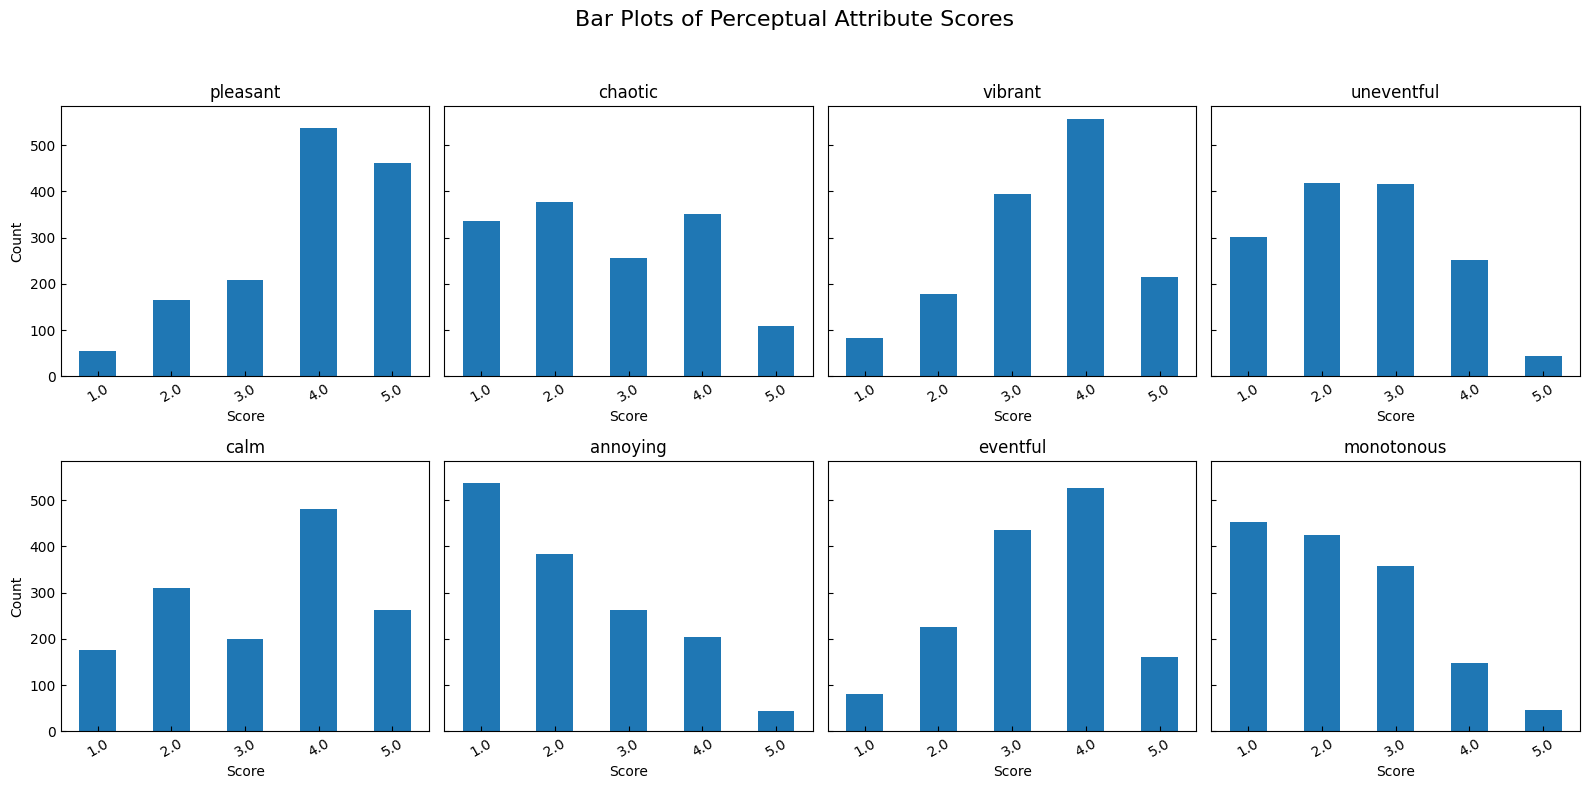

In [142]:
bar_plot_df = filtered_df.copy()
bar_plot_df.rename(columns=paq_dict, inplace=True)
display(bar_plot_df.iloc[:, 1:22])

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the perceptual attributes
perceptual_attributes = [
    "pleasant", "chaotic", "vibrant", "uneventful",
    "calm", "annoying", "eventful", "monotonous"
]

# Count the number of occurrences for each perceptual score (1.0 to 5.0) per attribute
value_counts_df = pd.DataFrame({
    attr: bar_plot_df[attr].value_counts().sort_index()
    for attr in perceptual_attributes
})

# Plotting the barplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()

for i, attr in enumerate(perceptual_attributes):
    value_counts_df[attr].plot(kind='bar', ax=axes[i])
    axes[i].set_title(attr)
    axes[i].set_xlabel("Score")
    axes[i].set_ylabel("Count")
    axes[i].set_xticks(range(5))
    axes[i].set_xticklabels(['1.0', '2.0', '3.0', '4.0', '5.0'], rotation=30)

plt.suptitle("Bar Plots of Perceptual Attribute Scores", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



In [139]:
bar_plot_df.pleasant.value_counts()

pleasant
4.0    538
5.0    462
3.0    209
2.0    165
1.0     56
Name: count, dtype: int64

In [129]:
# ['LocationID', 'latitude', 'longitude', 'pleasant', 'chaotic', 'vibrant', 'uneventful', 'calm', 'annoying', 'eventful']
ssid = sspy.surveys.rename_paqs(ssid)

ssid.iloc[:5, :23]

,LocationID,SessionID,GroupID,RecordID,start_time,end_time,latitude,longitude,Language,Survey_Version,...,ssi04,PAQ1,PAQ4,PAQ2,PAQ7,PAQ8,PAQ5,PAQ3,PAQ6,sss01
0,CarloV,CarloV2,2CV12,1434,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,3.0,2.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,3.0
1,CarloV,CarloV2,2CV12,1435,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,3.0,2.0,4.0,4.0,1.0,1.0,4.0,4.0,4.0,4.0
2,CarloV,CarloV2,2CV13,1430,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,4.0,5.0,1.0,3.0,3.0,4.0,2.0,3.0,1.0,4.0
3,CarloV,CarloV2,2CV13,1431,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,4.0,5.0,1.0,3.0,3.0,4.0,2.0,3.0,2.0,4.0
4,CarloV,CarloV2,2CV13,1432,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,3.0,5.0,2.0,3.0,3.0,4.0,2.0,3.0,3.0,4.0


In [109]:
regentsparkfields.head()

,LocationID,SessionID,GroupID,RecordID,start_time,end_time,latitude,longitude,Language,Survey_Version,...,ssi03,ssi04,PAQ1,PAQ4,PAQ2,PAQ7,PAQ8,PAQ5,PAQ3,PAQ6
529,RegentsParkFields,RegentsParkFields1,RF101,792,2019-05-31 11:36:43,2019-05-31 11:39:19,51.526920,-0.129714,eng,engISO2018,...,2.0,2.0,5.0,1.0,2.0,1.0,5.0,1.0,3.0,1.0
530,RegentsParkFields,RegentsParkFields1,RF101,793,2019-05-31 10:36:48,2019-05-31 10:38:23,51.527009,-0.129351,eng,engISO2018,...,5.0,2.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,3.0
531,RegentsParkFields,RegentsParkFields1,RF102,794,2019-05-31 10:37:43,2019-05-31 10:39:34,51.532391,-0.146576,eng,engISO2018,...,3.0,2.0,5.0,1.0,2.0,3.0,5.0,1.0,3.0,3.0
532,RegentsParkFields,RegentsParkFields1,RF102,795,2019-05-31 10:37:52,2019-05-31 10:39:42,51.526950,-0.129563,eng,engISO2018,...,4.0,4.0,5.0,2.0,2.0,2.0,4.0,1.0,4.0,2.0
533,RegentsParkFields,RegentsParkFields1,RF103,796,2019-05-31 11:41:57,2019-05-31 11:43:52,51.531067,-0.150364,eng,engISO2018,...,3.0,2.0,4.0,3.0,5.0,3.0,3.0,3.0,3.0,2.0


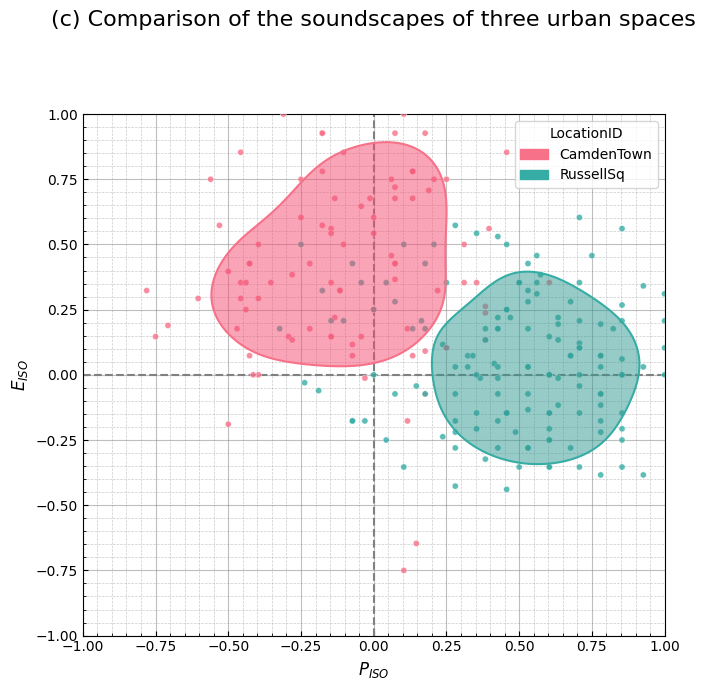

In [171]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

sspy.plotting.density(
    sspy.isd.select_location_ids(filtered_df, ["CamdenTown", "RussellSq"]),
    hue="LocationID",
    title="(c) Comparison of the soundscapes of three urban spaces\n\n",
    palette="husl",
    density_type="simple",
    ax=ax,
)
plt.tight_layout()
plt.show()

In [167]:
# filtered_df_test = filtered_df.drop_duplicates(subset=['GroupID'], keep='first')
filtered_df_test = pd.read_csv('df_reordered.csv')
filtered_df_test.drop(columns=['ISOPleasant', 'ISOEventful'], inplace=True)
filtered_df_test = sspy.surveys.rename_paqs(filtered_df_test)
filtered_df_test = sspy.surveys.add_iso_coords(filtered_df_test)
filtered_df_test

,PAQ1,PAQ3,PAQ4,PAQ2,PAQ7,PAQ8,PAQ5,PAQ6,GroupID,LocationID,...,THD_THD_Max,THD_Min_Max,THD_Max_Max,THD_L5_Max,THD_L10_Max,THD_L50_Max,THD_L90_Max,THD_L95_Max,ISOPleasant,ISOEventful
0,5.000000,3.500000,1.500000,4.5,3.500000,4.500000,1.000000,2.5,2CV11,CarloV,...,-0.92,-16.16,61.79,29.35,23.91,0.48,-13.69,-14.38,0.780330,-0.073223
1,2.000000,3.000000,2.500000,4.0,2.500000,1.500000,3.000000,3.0,2CV12,CarloV,...,-0.09,-11.76,54.18,34.82,26.53,5.57,-9.00,-10.29,-0.103553,0.198223
2,5.000000,3.000000,1.333333,3.0,3.000000,4.000000,2.000000,2.0,2CV13,CarloV,...,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.30,-17.33,0.579146,-0.122039
3,4.000000,4.000000,4.000000,4.0,1.000000,2.000000,2.000000,1.0,2CV14,CarloV,...,-0.89,-17.02,55.82,26.73,19.56,1.15,-13.15,-14.52,0.280330,0.676777
4,4.000000,2.500000,1.500000,2.5,2.000000,4.500000,1.500000,2.0,2CV15,CarloV,...,-0.48,-13.68,58.08,33.22,26.86,5.59,-9.88,-11.04,0.515165,-0.131282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,3.000000,3.000000,4.000000,3.0,3.000000,3.000000,4.000000,3.0,TS422,TorringtonSq,...,-1.93,-12.09,56.61,37.47,31.31,7.91,-9.82,-10.74,-0.176777,0.073223
808,3.333333,3.333333,3.666667,4.0,2.333333,2.333333,3.333333,2.0,TS423,TorringtonSq,...,-1.06,-1.40,58.63,42.41,33.92,19.06,3.54,1.84,0.048815,0.347631
809,4.000000,4.000000,5.000000,5.0,1.000000,4.000000,3.000000,1.0,TS424,TorringtonSq,...,-0.58,-4.86,54.12,42.47,33.38,16.17,-1.25,-2.21,0.323223,0.676777
810,2.000000,3.000000,3.000000,4.0,3.000000,2.000000,3.000000,4.0,TS425,TorringtonSq,...,-1.17,-4.12,58.20,42.15,33.57,19.89,2.25,0.42,-0.176777,0.073223


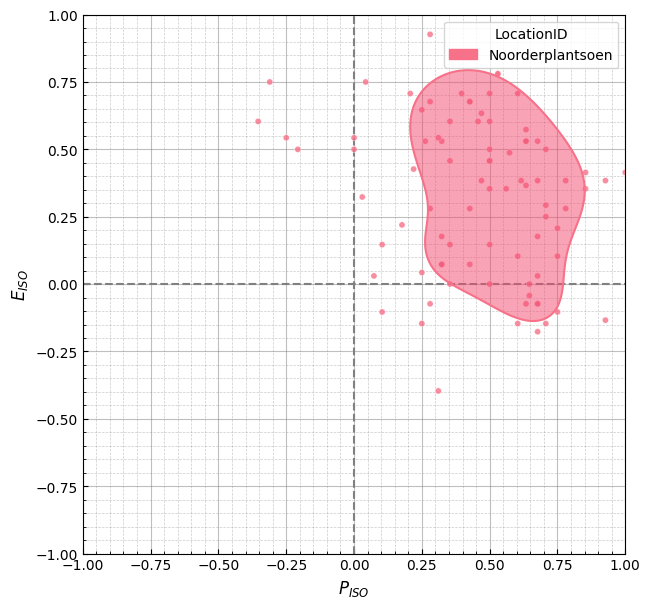

In [169]:
location = "Noorderplantsoen"
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

sspy.density(
    sspy.isd.select_location_ids(filtered_df, location),
    hue="LocationID",
    title=None,
    palette="husl",
    ax=ax,
    density_type="simple",
)

# Save as PDF
plt.savefig("data/output/median_perception_density_plot.pdf", format="pdf", bbox_inches="tight")

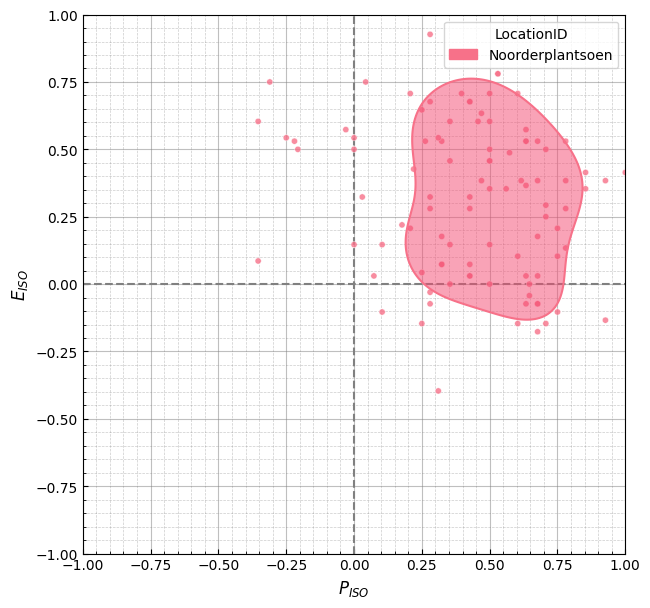

In [166]:
location = "Noorderplantsoen"
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

sspy.density(
    sspy.isd.select_location_ids(ssid, location),
    hue="LocationID",
    title=None,
    palette="husl",
    ax=ax,
    density_type="simple",
)

# Save as PDF
plt.savefig("data/output/median_perception_density_plot.pdf", format="pdf", bbox_inches="tight")

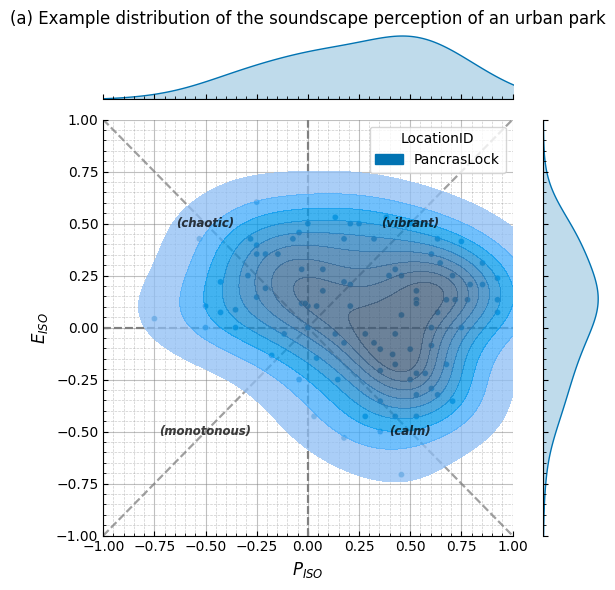

In [ ]:
# Jointplot has not yet been reimplemented in the newest version of Soundscapy. This will be added back soon.

sspy.plotting.jointplot(
    sspy.isd.select_location_ids(ssid, "PancrasLock"),
    title="(a) Example distribution of the soundscape perception of an urban park",
    diagonal_lines=True,
    hue="LocationID",
    legend=True,
    alpha=0.75,
)
plt.tight_layout()

c:\Users\pepij\OneDrive - Delft University of Technology\AI-Soundscape\.venv\Lib\site-packages\soundscapy\plotting\plot_functions.py:958: UserWarning: Density plots are not recommended for small datasets (<30 samples).
  _valid_density(data)
c:\Users\pepij\OneDrive - Delft University of Technology\AI-Soundscape\.venv\Lib\site-packages\soundscapy\plotting\plot_functions.py:958: UserWarning: Density plots are not recommended for small datasets (<30 samples).
  _valid_density(data)


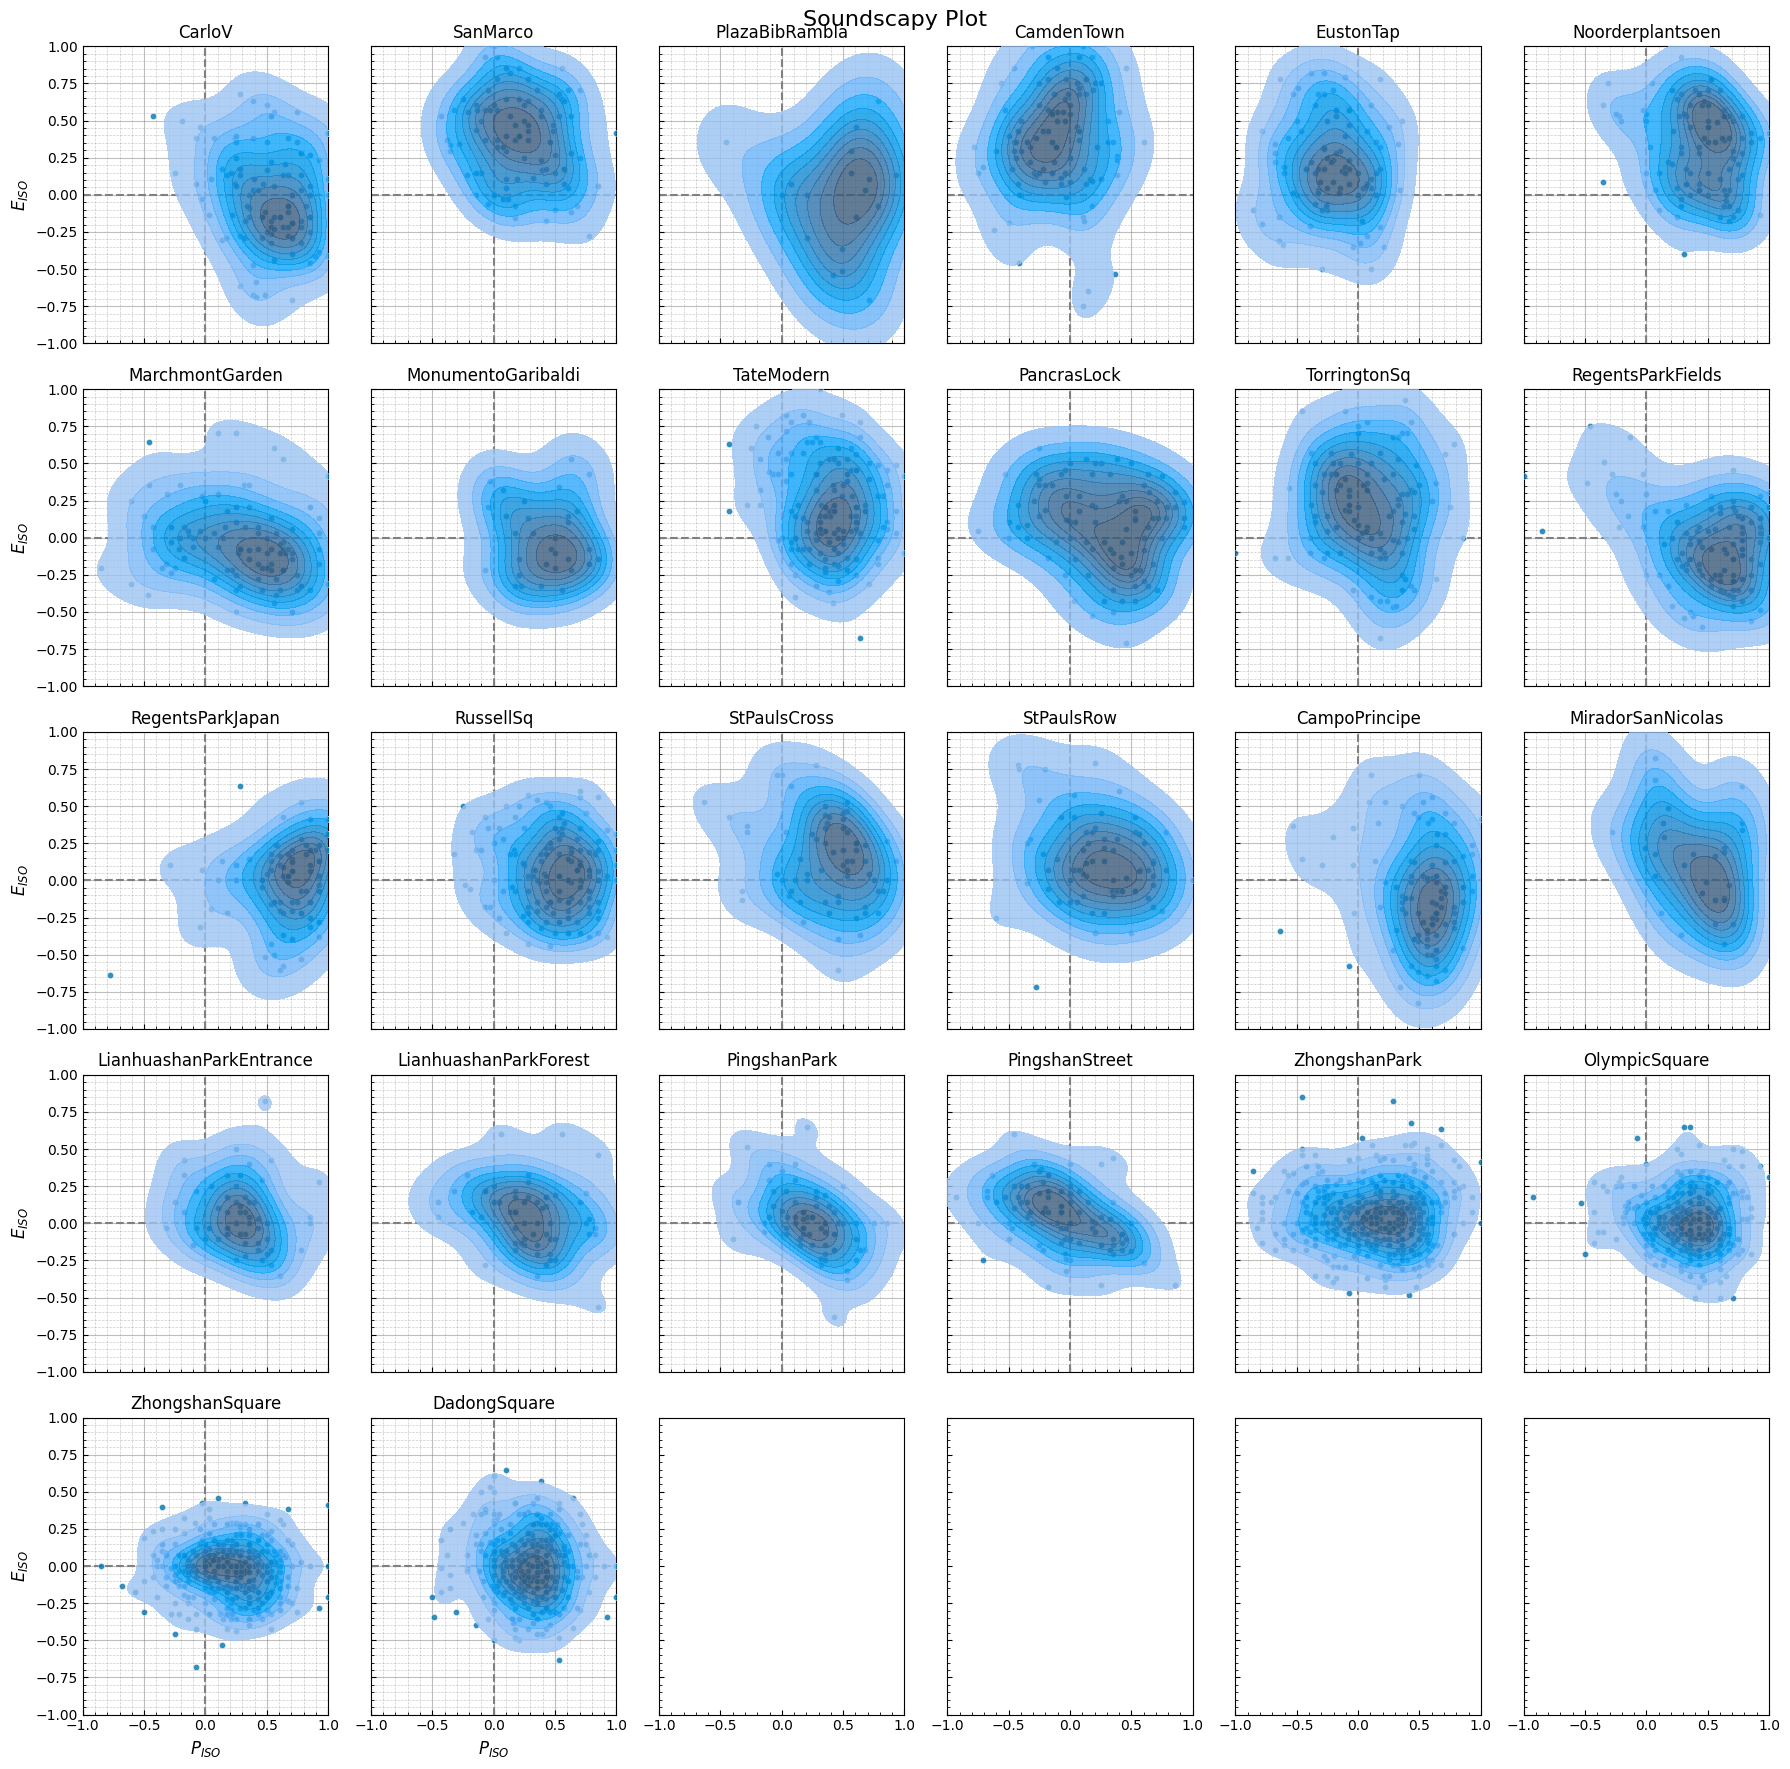

In [9]:
fig, ax = sspy.create_iso_subplots(
    data=ssid,
    plot_layers=["density", "scatter"],
    subplot_size=(3, 3),
    subplot_by="LocationID",
)

plt.show()